In [13]:
import pandas as pd

# load the metrics

vit_ensemble = pd.read_csv("vit_ensemble_metrics.csv")
conv_ensemble = pd.read_csv("conv_ensemble_metrics.csv")
deit3_base_16 = pd.read_csv("deit3_base_16_metrics.csv")
convnext = pd.read_csv("convnext_metrics.csv")
resnet = pd.read_csv("resnet_metrics.csv")
efficientnet = pd.read_csv("efficientnet_metrics.csv")
vit_base_32 = pd.read_csv("vit_base_32_metrics.csv")
vit_base_16 = pd.read_csv("vit_base_16_metrics.csv")
vit_large_32 = pd.read_csv("vit_large_32_metrics.csv")

In [14]:
vit_ensemble.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
vit_ensemble.describe()

,test/Accuracy,test/BalancedAccuracy
count,11.000000,11.000000
mean,0.808250,0.788499
std,0.001695,0.001975
min,0.805419,0.784703
25%,0.807005,0.787939
50%,0.808590,0.788413
75%,0.809167,0.789432
max,0.810608,0.791644


In [15]:
conv_ensemble.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
conv_ensemble.describe()

,test/Accuracy,test/BalancedAccuracy
count,11.000000,11.000000
mean,0.816976,0.780758
std,0.002347,0.002136
min,0.812626,0.777598
25%,0.815221,0.779015
50%,0.817815,0.781542
75%,0.818536,0.782137
max,0.819833,0.783742


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Accuracy of Models')

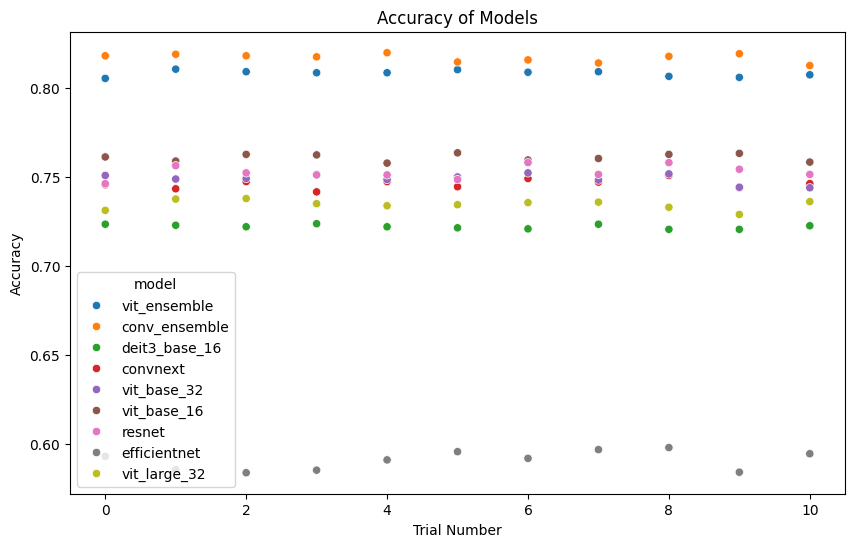

In [17]:
all_metrics = pd.concat(
    [
        vit_ensemble,
        conv_ensemble,
        deit3_base_16,
        convnext,
        vit_base_32,
        vit_base_16,
        resnet,
        efficientnet,
        vit_large_32,
    ],
    axis=0,
)


all_metrics["model"] = (
    ["vit_ensemble"] * vit_ensemble.shape[0]
    + ["conv_ensemble"] * conv_ensemble.shape[0]

    + ["deit3_base_16"] * deit3_base_16.shape[0]
    + ["convnext"] * convnext.shape[0]
    + ["vit_base_32"] * vit_base_32.shape[0]
    + ["vit_base_16"] * vit_base_16.shape[0]
    + ["resnet"] * resnet.shape[0]
    + ["efficientnet"] * efficientnet.shape[0]
    + ["vit_large_32"] * vit_large_32.shape[0]
)

all_metrics


plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_metrics, x=all_metrics.index, y="test/Accuracy", hue="model")
plt.xlabel("Trial Number")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models")

Text(0.5, 1.0, 'Balanced Accuracy of Models')

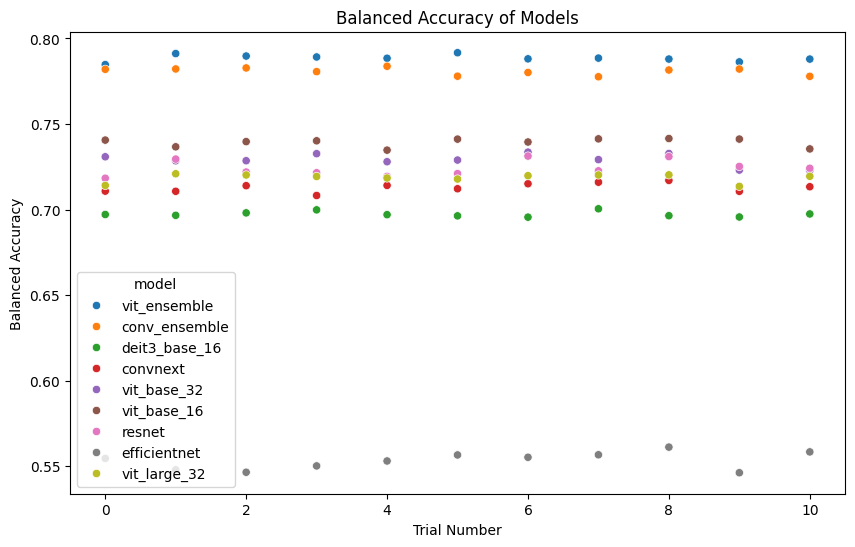

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=all_metrics, x=all_metrics.index, y="test/BalancedAccuracy", hue="model"
)

plt.xlabel("Trial Number")
plt.ylabel("Balanced Accuracy")
plt.title("Balanced Accuracy of Models")

# Statistical Testing for the Mean of a Normal Distribution of the response variable

Text(0.5, 1.0, 'EfficientNet Balanced Accuracy QQ Plot')

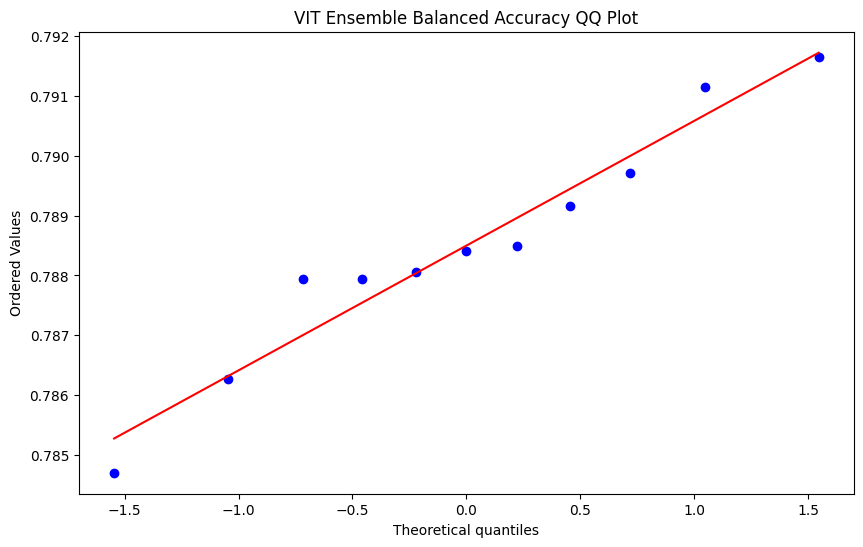

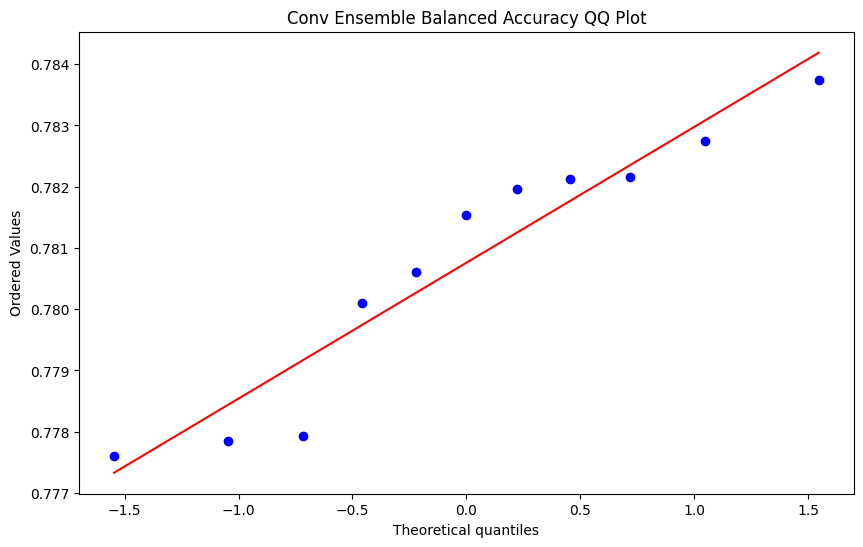

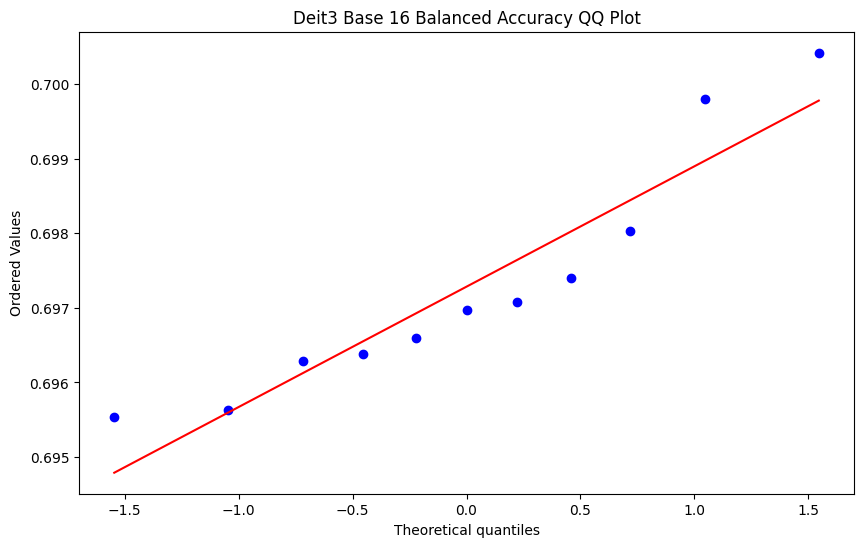

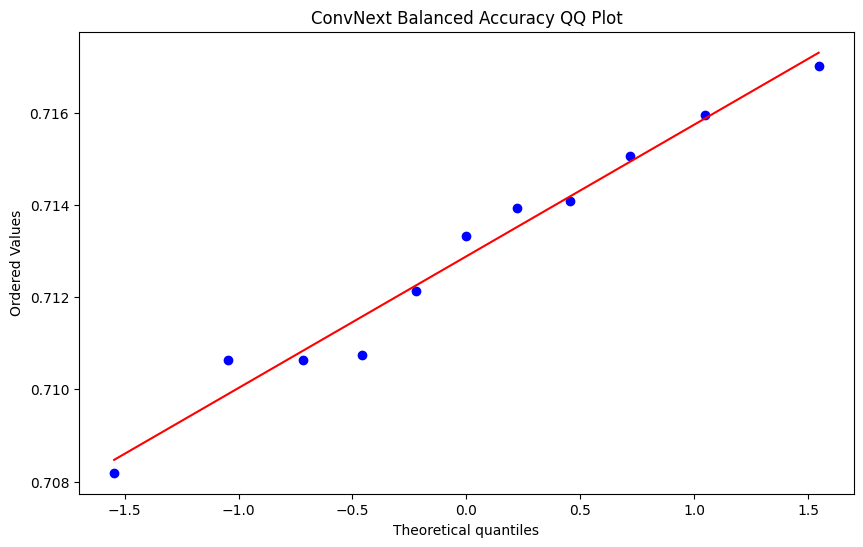

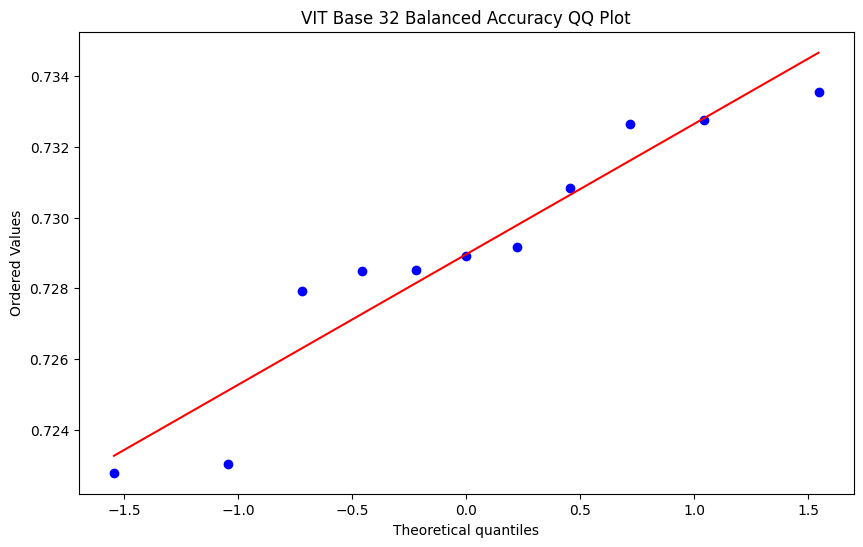

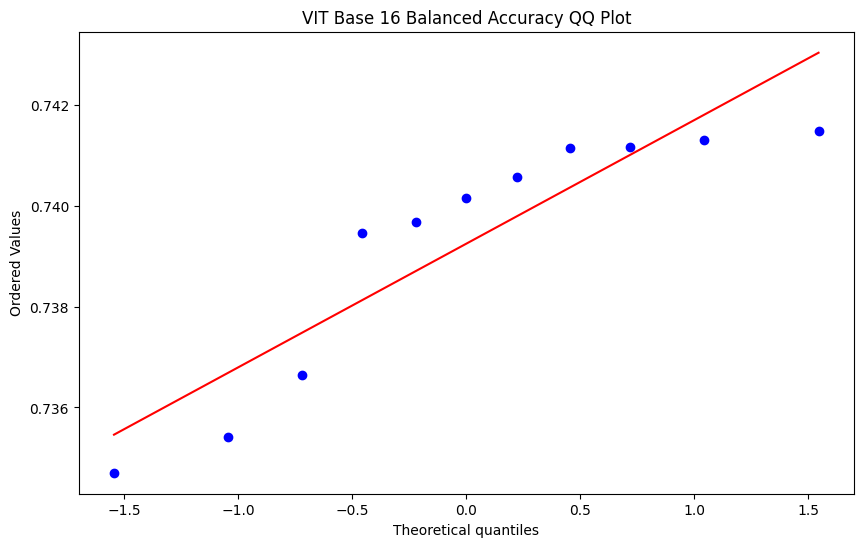

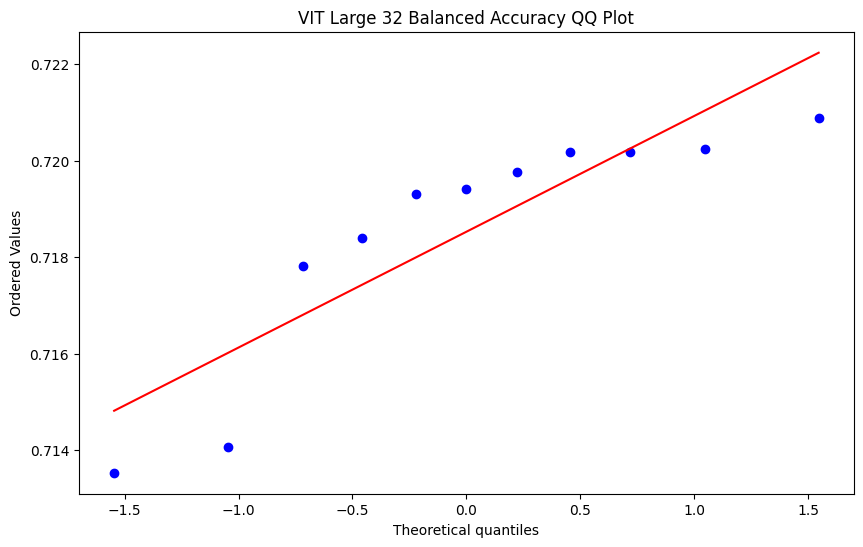

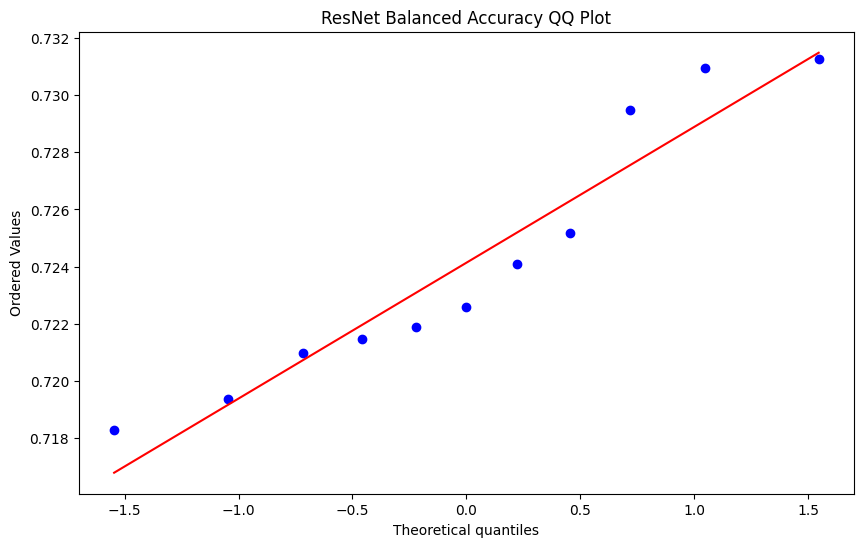

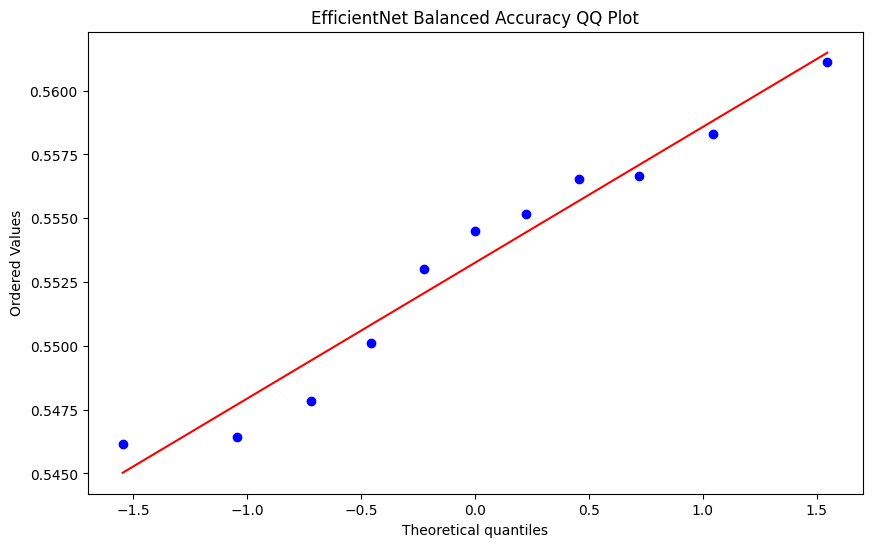

In [19]:
import scipy.stats as stats



# we use the qq plots to check if data is normally distributed


plt.figure(figsize=(10, 6))
stats.probplot(vit_ensemble["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("VIT Ensemble Balanced Accuracy QQ Plot")



plt.figure(figsize=(10, 6))
stats.probplot(conv_ensemble["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("Conv Ensemble Balanced Accuracy QQ Plot")



plt.figure(figsize=(10, 6))
stats.probplot(deit3_base_16["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("Deit3 Base 16 Balanced Accuracy QQ Plot")



plt.figure(figsize=(10, 6))
stats.probplot(convnext["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("ConvNext Balanced Accuracy QQ Plot")



plt.figure(figsize=(10, 6))
stats.probplot(vit_base_32["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("VIT Base 32 Balanced Accuracy QQ Plot")



plt.figure(figsize=(10, 6))
stats.probplot(vit_base_16["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("VIT Base 16 Balanced Accuracy QQ Plot")

plt.figure(figsize=(10, 6))
stats.probplot(vit_large_32["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("VIT Large 32 Balanced Accuracy QQ Plot")



plt.figure(figsize=(10, 6))
stats.probplot(resnet["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("ResNet Balanced Accuracy QQ Plot")



plt.figure(figsize=(10, 6))
stats.probplot(efficientnet["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("EfficientNet Balanced Accuracy QQ Plot")

## Normality Assumption

In [20]:
def check_normality(df: pd.DataFrame, name: str):
    print(f"-Checking normality for {name}-")
    shapiro_stat, shapiro_p = stats.shapiro(df["test/BalancedAccuracy"])
    print(f"Shapiro Statistic: {shapiro_stat}")
    print(f"Shapiro P Value: {shapiro_p}")
    if shapiro_p < 0.05:
        print(f"The data {name} is not normally distributed")
    else:
        print(f"The data {name} is normally distributed")
    print()


check_normality(deit3_base_16, "Deit3 Base 16")
check_normality(convnext, "ConvNext")
check_normality(vit_ensemble, "VIT Ensemble")
check_normality(conv_ensemble, "Conv Ensemble")
check_normality(vit_base_32, "VIT Base 32")
check_normality(vit_base_16, "VIT Base 16")
check_normality(vit_large_32, "VIT Large 32")
check_normality(resnet, "ResNet")
check_normality(efficientnet, "EfficientNet")

-Checking normality for Deit3 Base 16-
Shapiro Statistic: 0.8830657189302524
Shapiro P Value: 0.11378138538028743
The data Deit3 Base 16 is normally distributed

-Checking normality for ConvNext-
Shapiro Statistic: 0.9694417945449781
Shapiro P Value: 0.8808380883181934
The data ConvNext is normally distributed

-Checking normality for VIT Ensemble-
Shapiro Statistic: 0.9568463261258782
Shapiro P Value: 0.73182966333549
The data VIT Ensemble is normally distributed

-Checking normality for Conv Ensemble-
Shapiro Statistic: 0.8989075509043455
Shapiro P Value: 0.17925040349026589
The data Conv Ensemble is normally distributed

-Checking normality for VIT Base 32-
Shapiro Statistic: 0.8989927085597555
Shapiro P Value: 0.17968137417883567
The data VIT Base 32 is normally distributed

-Checking normality for VIT Base 16-
Shapiro Statistic: 0.8145937445069928
Shapiro P Value: 0.014640769765618372
The data VIT Base 16 is not normally distributed

-Checking normality for VIT Large 32-
Shapiro S

## Shapiro-Wilk Test for Homogeneity of Variance

In [21]:
# Levene test is for equal variances
levene_stat, levene_p = stats.levene(
    vit_ensemble["test/BalancedAccuracy"],
    conv_ensemble["test/BalancedAccuracy"],
    vit_base_32["test/BalancedAccuracy"],
    convnext["test/BalancedAccuracy"],
)
print(levene_stat, levene_p)
if levene_p < 0.05:
    print("The variances are not equal")
    can_make_anova = False
else:
    print("The variances are equal")

1.0046081184095734 0.40074679959232434
The variances are equal


## ANOVA Test for the Mean of a Normal Distribution

In [22]:
# ANOVA test
fvalue, pvalue = stats.f_oneway(
    vit_ensemble["test/BalancedAccuracy"],
    conv_ensemble["test/BalancedAccuracy"],
    convnext["test/BalancedAccuracy"],
    vit_base_32["test/BalancedAccuracy"],
)

print(fvalue, pvalue)
if pvalue < 0.05:
    print("Reject the null hypothesis, the means are not equal")
    print(
        "There is a significant difference between the models in terms of balanced accuracy"
    )
else:
    print("Fail to reject the null hypothesis, the means are equal")
    print(
        "There is no significant difference between the models in terms of balanced accuracy"
    )

2188.9016670591227 2.2450481125055865e-44
Reject the null hypothesis, the means are not equal
There is a significant difference between the models in terms of balanced accuracy


## Pairwise T-Test for the Mean of a Normal Distribution of the response variable

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
conv_ensemble      convnext  -0.0679    0.0 -0.0721 -0.0636   True
conv_ensemble deit3_base_16  -0.0835    0.0 -0.0877 -0.0792   True
conv_ensemble  efficientnet  -0.2275    0.0 -0.2318 -0.2232   True
conv_ensemble        resnet  -0.0566    0.0 -0.0609 -0.0524   True
conv_ensemble   vit_base_16  -0.0415    0.0 -0.0458 -0.0372   True
conv_ensemble   vit_base_32  -0.0518    0.0 -0.0561 -0.0475   True
conv_ensemble  vit_ensemble   0.0077    0.0  0.0035   0.012   True
conv_ensemble  vit_large_32  -0.0622    0.0 -0.0665  -0.058   True
     convnext deit3_base_16  -0.0156    0.0 -0.0199 -0.0113   True
     convnext  efficientnet  -0.1596    0.0 -0.1639 -0.1554   True
     convnext        resnet   0.0113    0.0   0.007  0.0155   True
     convnext   vit_base_16   0.0264    0.0  0.0221  0.0306   

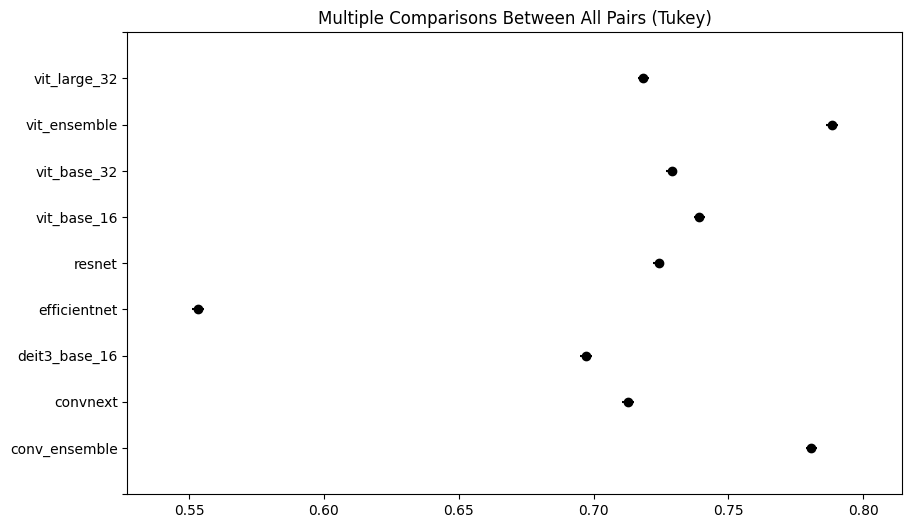

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# we can use Tukey's HSD test to find out which models are different
# the tukeyhsd test performs multiple pairwise comparisons using the studentized range distribution

m_comp = pairwise_tukeyhsd(all_metrics["test/BalancedAccuracy"], all_metrics["model"])

print(m_comp)

m_comp.plot_simultaneous()

plt.show()